<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="./images/simpson.PNG" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.5 + 20x - 300x^2 + 650x^3 - 900x^4 + 500x^5$ over the interval $[0, 0.7]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.5 + 20x - 300x^2 + 650x^3 - 900x^4 + 500x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [57]:
import numpy as np

def f(x):
    x = np.array(x)
    return 0.5 + 20*x - 300*(x**2) + 650*(x**3) - 900*(x**4) + 500*(x**5)

print("f(0.7) = ", f(0.7))



f(0.7) =  -41.60500000000002


##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [70]:
import numpy as np

def lagrange(x0,x1,x2,x):
    # defining values to take required inputs
    x0 = np.array(x0)
    x1 = np.array(x1)
    x2 = np.array(x2)
    x = np.array(x)
    
    # dividing each lagrange polynomial section and adding them
    l0 = f(x0)*(((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2)))
    l1 = f(x1)*(((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2)))
    l2 = f(x2)*(((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1)))
    
    return l0 + l1 + l2


# check lagrange using scalar and vector values
xScalar = 0.3
scalarInp = lagrange(0.1, 0.08, 5, xScalar)
print("Lagrange 2nd degree polynomial for scalar input:", scalarInp)

xVal = [2, 0.5, 9]
vectorInp = lagrange(0.1, 4, 0.7, xVal)
print("Lagrange 2nd degree polynomial for vector input:", vectorInp)


Lagrange 2nd degree polynomial for scalar input: 1956.0299599999994
Lagrange 2nd degree polynomial for vector input: [  61042.6     -2009.075 1828920.25 ]


##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [71]:
import numpy as np

a = 0
b = 0.7

interval = np.array([a, b])

print("Interval: ", interval)


Interval:  [0.  0.7]


##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

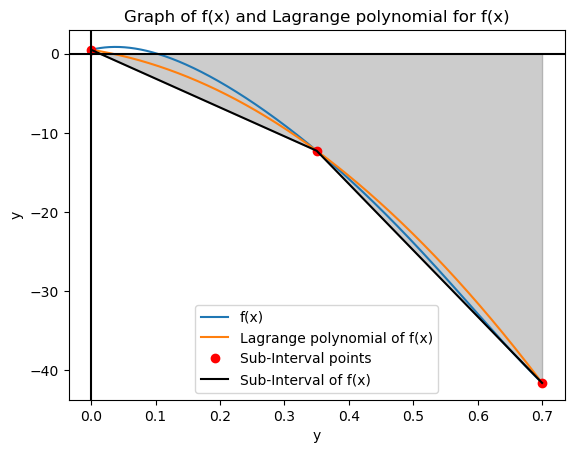

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# setting x and y values for f(x) and lagrange
x = np.arange(start= interval[0], stop= interval[1],step= 0.001)
yf = f(x)
yl = lagrange(interval[0], np.mean(interval), interval[1], x)
sub_intervals = np.linspace(interval[0], interval[1], 3)            # equally divide intervals


# plot graph using sub-intervals

plt.title("Graph of f(x) and Lagrange polynomial for f(x)")
plt.xlabel("y")
plt.ylabel("y")
plt.plot(x, yf)
plt.plot(x, yl)
plt.plot(sub_intervals, f(sub_intervals), "ro")
plt.plot(sub_intervals, f(sub_intervals), "k-")
plt.fill_between(sub_intervals, f(sub_intervals), color="k", alpha=0.2)
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.legend(['f(x)', 'Lagrange polynomial of f(x)', 'Sub-Interval points', 'Sub-Interval of f(x)'])
plt.show()








##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [74]:
import numpy as np

def simpson(intrv):
     midpoint = (intrv[0] + intrv[1]) / 2
     x0 = intrv[0]
     x2 = intrv[1]
     
     f0 = f(x0)
     f1 = f(midpoint)
     f2 = f(x2)     
     I = (x2-x0)*((f0 + 4*f1 + f2)/6)
     
     return I
     

print("Simpson's 1/3 rule over the interval ",interval, " is: " ,simpson(interval))
     



Simpson's 1/3 rule over the interval  [0.  0.7]  is:  -10.517281250000002


##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [75]:
import numpy as np

def f_integral(intrv):
    #integral = 0.5*x + 10*(x**2) - 100*(x**3) + 162.5*(x**4) - 180*(x**5) + (500/6)*(x**6)
    a = intrv[0]
    b = intrv[1]
    upperVal = 0.5*b + 10*(b**2) - 100*(b**3) + 162.5*(b**4) - 180*(b**5) + (500/6)*(b**6)
    lowerVal = 0.5*a + 10*(a**2) - 100*(a**3) + 162.5*(a**4) - 180*(a**5) + (500/6)*(a**6)
    integral = upperVal - lowerVal
    
    return integral
    

I = simpson(interval)
actualValue = f_integral(interval)

print("Interval: " ,interval)
print("Analytical value (actual) : ", actualValue, "\nSimpsons 1/3 value (numerical): ", I)

# absolute relative error

Ea = np.absolute((I - actualValue)/actualValue) * 100

print("Absolute Relative Error: ", np.round(Ea, 2), "%")



Interval:  [0.  0.7]
Analytical value (actual) :  -10.482266666666659 
Simpsons 1/3 value (numerical):  -10.517281250000002
Absolute Relative Error:  0.33 %
